# Making imports

In [4]:
import sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import plotly
import plotly.graph_objects as go


sys.path.append('..')
import sncf_utils as f
from sncf_connection import SNCF

sns.set()

In [44]:
pd.to_datetime(2019)

Timestamp('1970-01-01 00:00:00.000002019')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
%aimport sncf_connection
%aimport sncf_utils

In [7]:
sncf = SNCF('../sncf.token')

In [8]:
sncf.print_test()

tooto


# Loading

In [24]:
f.DATA_PATH

'/Users/thibaud/Documents/Data/SNCF/'

In [25]:
file_name = 'regularite-mensuelle-tgv-aqst.csv'
file_path = f.DATA_PATH + 'csv/' + file_name
df = pd.read_csv(file_path, sep=';')
df.head()

,Année,Mois,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet (min),Nombre de circulations prévues,Nombre de trains annulés,Commentaire (facultatif) annulations,Nombre de trains en retard au départ,...,Retard moyen trains en retard > 15min,Nombre trains en retard > 30min,Nombre trains en retard > 60min,Période,Retard pour causes externes,Retard à cause infrastructure ferroviaire,Retard à cause gestion trafic,Retard à cause matériel roulant,Retard à cause gestion en gare et réutilisation de matériel,Retard à cause prise en compte voyageurs
0,2018,3.0,NaN,STRASBOURG,PARIS EST,112.402439,505.0,13.0,NaN,250.0,...,5.754031,26.0,6.0,2018-03,37.662338,15.584416,19.480519,16.883117,6.493506,3.896104
1,2018,3.0,NaN,PARIS NORD,DUNKERQUE,120.996310,285.0,14.0,NaN,65.0,...,6.697417,19.0,7.0,2018-03,30.769231,17.948718,15.384615,33.333333,2.564103,0.000000
2,2018,3.0,NaN,LYON PART DIEU,PARIS LYON,120.549770,664.0,11.0,NaN,404.0,...,2.210031,12.0,1.0,2018-03,39.215686,5.882353,13.725490,23.529412,15.686275,1.960784
3,2018,3.0,NaN,PARIS LYON,GENEVE,194.005000,203.0,3.0,NaN,26.0,...,0.982500,4.0,0.0,2018-03,25.000000,15.000000,35.000000,10.000000,15.000000,0.000000
4,2018,8.0,NaN,LILLE,MARSEILLE ST CHARLES,309.389535,173.0,1.0,NaN,46.0,...,10.442151,13.0,6.0,2018-08,25.925926,7.407407,18.518519,29.629630,11.111111,7.407407


In [22]:
print('Taille du dataset : {}'.format(df.shape))
nb_col = df.shape[0]
pd.set_option('display.max_columns', nb_col)

Taille du dataset : (6453, 29)


# Cleaning

In [27]:
#{i:f.transfoCol(i) for i in df.columns}

In [28]:
rename_dict = {'Année': 'annee',
 'Mois': 'mois',
 'Service': 'service',
 'Gare de départ': 'gare_depart',
 "Gare d'arrivée": 'gare_arrivee',
 'Durée moyenne du trajet (min)': 'duree_moyenne_trajet',
 'Nombre de circulations prévues': 'nbr_circulations_prevues',
 'Nombre de trains annulés': 'nbr_trains_annules',
 'Commentaire (facultatif) annulations': 'commentaire_facultatif_annulations',
 'Nombre de trains en retard au départ': 'nbr_trains_retard_depart',
 'Retard moyen des trains en retard au départ (min)': 'retard_moyen_trains_retard_depart__min',
 'Retard moyen de tous les trains au départ (min)': 'retard_moyen_tous_les_trains_depart__min',
 'Commentaire (facultatif) retards au départ': 'commentaire_facultatif_retards_depart',
 "Nombre de trains en retard à l'arrivée": 'nbr_trains_retard_arrivee',
 "Retard moyen des trains en retard à l'arrivée (min)": 'retard_moyen_trains_retard_arrivee__min',
 "Retard moyen de tous les trains à l'arrivée (min)": 'retard_moyen_tous_les_trains_arrivee__min',
 "Commentaire (facultatif) retards à l'arrivée": 'commentaire_facultatif_retards_arrivee',
 '% trains en retard pour causes externes (météo, obstacles, colis suspects, malveillance, mouvements sociaux, etc.)': 'pct_retard_causes_externes',
 '% trains en retard à cause infrastructure ferroviaire (maintenance, travaux)': 'pct_retard_cause_infrastructure_ferroviaire',
 '% trains en retard à cause gestion trafic (circulation sur ligne ferroviaire, interactions réseaux)': 'pct_retard_cause_gestion_trafic',
 '% trains en retard à cause matériel roulant': 'pct_retard_cause_materiel_roulant',
 '% trains en retard à cause gestion en gare et réutilisation de matériel': 'pct_retard_cause_gestion_en_gare',
 '% trains en retard à cause prise en compte voyageurs (affluence, gestions PSH, correspondances)': 'pct_retard_cause_prise_en_compte_voyageurs',
 'Nombre trains en retard > 15min': 'nbr_trains_15min',
 'Retard moyen trains en retard > 15min': 'retard_moyen_trains_15min',
 'Nombre trains en retard > 30min': 'nbr_trains_30min',
 'Nombre trains en retard > 60min': 'nbr_trains_60min',
 'Période': 'periode',
 'Retard pour causes externes': 'retard_causes_externes',
 'Retard à cause infrastructure ferroviaire': 'retard_infrastructure_ferroviaire',
 'Retard à cause gestion trafic': 'retard_gestion_trafic',
 'Retard à cause matériel roulant': 'retard_materiel_roulant',
 'Retard à cause gestion en gare et réutilisation de matériel': 'retard_gestion_en_gare_et_reutilisation_de_materiel',
 'Retard à cause prise en compte voyageurs': 'retard_prise_en_compte_voyageurs'}

In [29]:
# Renaming columns
df = df.rename(columns=rename_dict)

In [30]:
df.head()

,annee,mois,service,gare_depart,gare_arrivee,duree_moyenne_trajet,nbr_circulations_prevues,nbr_trains_annules,commentaire_facultatif_annulations,nbr_trains_retard_depart,retard_moyen_trains_retard_depart__min,retard_moyen_tous_les_trains_depart__min,commentaire_facultatif_retards_depart,nbr_trains_retard_arrivee,retard_moyen_trains_retard_arrivee__min,retard_moyen_tous_les_trains_arrivee__min,commentaire_facultatif_retards_arrivee,pct_retard_causes_externes,pct_retard_cause_infrastructure_ferroviaire,pct_retard_cause_gestion_trafic,pct_retard_cause_materiel_roulant,pct_retard_cause_gestion_en_gare,pct_retard_cause_prise_en_compte_voyageurs,nbr_trains_15min,retard_moyen_trains_15min,nbr_trains_30min,nbr_trains_60min,periode,retard_causes_externes,retard_infrastructure_ferroviaire,retard_gestion_trafic,retard_materiel_roulant,retard_gestion_en_gare_et_reutilisation_de_materiel,retard_prise_en_compte_voyageurs
0,2018,3.0,NaN,STRASBOURG,PARIS EST,112.402439,505.0,13.0,NaN,250.0,7.831733,4.039092,NaN,81.0,29.802058,5.754031,NaN,0.376623,0.155844,0.194805,0.168831,0.064935,0.038961,64.0,5.754031,26.0,6.0,2018-03,37.662338,15.584416,19.480519,16.883117,6.493506,3.896104
1,2018,3.0,NaN,PARIS NORD,DUNKERQUE,120.996310,285.0,14.0,NaN,65.0,18.206154,4.234379,NaN,39.0,41.282051,6.697417,NaN,0.307692,0.179487,0.153846,0.333333,0.025641,0.000000,28.0,6.697417,19.0,7.0,2018-03,30.769231,17.948718,15.384615,33.333333,2.564103,0.000000
2,2018,3.0,NaN,LYON PART DIEU,PARIS LYON,120.549770,664.0,11.0,NaN,404.0,5.177682,3.318836,NaN,56.0,23.882738,2.210031,NaN,0.392157,0.058824,0.137255,0.235294,0.156863,0.019608,39.0,2.210031,12.0,1.0,2018-03,39.215686,5.882353,13.725490,23.529412,15.686275,1.960784
3,2018,3.0,NaN,PARIS LYON,GENEVE,194.005000,203.0,3.0,NaN,26.0,10.032692,1.004250,NaN,20.0,24.045833,0.982500,NaN,0.250000,0.150000,0.350000,0.100000,0.150000,0.000000,20.0,0.982500,4.0,0.0,2018-03,25.000000,15.000000,35.000000,10.000000,15.000000,0.000000
4,2018,8.0,NaN,LILLE,MARSEILLE ST CHARLES,309.389535,173.0,1.0,NaN,46.0,6.396014,1.819767,NaN,37.0,37.442793,10.442151,"Pendant les deux premières semaines d’août, le...",0.259259,0.074074,0.185185,0.296296,0.111111,0.074074,37.0,10.442151,13.0,6.0,2018-08,25.925926,7.407407,18.518519,29.629630,11.111111,7.407407


__Il semblerait que les colonnes sur le nombre de train et le pct de train soient redondantes__

In [31]:
ser = df['pct_retard_cause_gestion_trafic'] * 100 - df['retard_gestion_trafic']
print(np.round((ser).sum(),3))

ser = df['pct_retard_causes_externes'] * 100 - df['retard_causes_externes']
print(np.round((ser).sum(),3))

ser = df['pct_retard_cause_materiel_roulant'] * 100 - df['retard_materiel_roulant']
print(np.round((ser).sum(),3))

0.0
0.0
0.0


Sur 3 essais, c'est plutot concluant. On décide donc de supprimer les colonnes avec nom à rallonge

In [32]:
drop_pct_double = [col for col in df.columns if 'pct_retard' in col]
df = df.drop(drop_pct_double, axis=1)

__Capture de la temporalité__

In [33]:
# Transformation de la colonne qui indique le datetime
df['periode'] = pd.to_datetime(df['periode'],errors='raise')

__Ordre des colonnes__

In [34]:
_ = [print(i) for i in df.columns]

annee
mois
service
gare_depart
gare_arrivee
duree_moyenne_trajet
nbr_circulations_prevues
nbr_trains_annules
commentaire_facultatif_annulations
nbr_trains_retard_depart
retard_moyen_trains_retard_depart__min
retard_moyen_tous_les_trains_depart__min
commentaire_facultatif_retards_depart
nbr_trains_retard_arrivee
retard_moyen_trains_retard_arrivee__min
retard_moyen_tous_les_trains_arrivee__min
commentaire_facultatif_retards_arrivee
nbr_trains_15min
retard_moyen_trains_15min
nbr_trains_30min
nbr_trains_60min
periode
retard_causes_externes
retard_infrastructure_ferroviaire
retard_gestion_trafic
retard_materiel_roulant
retard_gestion_en_gare_et_reutilisation_de_materiel
retard_prise_en_compte_voyageurs


In [36]:
def create_liaison(line):
    dep = line['gare_depart']
    arr = line['gare_arrivee']
    trajet =[dep, arr]
    trajet.sort()
    liaison = '_'.join(trajet)
    return liaison
    
    
df['liaison'] = df.apply(create_liaison, axis=1)
df['liaison_id'], _ = encode_serie(df['liaison'])
del(df['liaison'])

In [37]:
# Réorganisation
keys= ['periode', 'annee', 'mois', 'gare_depart', 'gare_arrivee', 'liaison_id']
nbr_train = ['nbr_circulations_prevues', 'nbr_trains_annules', 'nbr_trains_retard_depart', 'nbr_trains_retard_arrivee', 'nbr_trains_15min', 'nbr_trains_30min', 'nbr_trains_60min']
duree = ['duree_moyenne_trajet', 'retard_moyen_trains_retard_depart__min', 'retard_moyen_tous_les_trains_depart__min', 'retard_moyen_trains_retard_arrivee__min', 'retard_moyen_tous_les_trains_arrivee__min', 'retard_moyen_trains_15min']
cause = ['retard_causes_externes', 'retard_infrastructure_ferroviaire', 'retard_gestion_trafic', 'retard_materiel_roulant', 'retard_gestion_en_gare_et_reutilisation_de_materiel', 'retard_prise_en_compte_voyageurs']
comments =  ['service', 'commentaire_facultatif_annulations', 'commentaire_facultatif_retards_depart', 'commentaire_facultatif_retards_arrivee']

df_reshape = df[keys + nbr_train + duree + cause + comments]
if df_reshape.shape == df.shape:
    df = df_reshape.copy()
    del(df_reshape)
    print('DF reshaped')
else:
    print('The number of columns does not match')
    print('Initial df {}, VS. Reshaped df {}'.format(df.shape, df_reshape.shape))
    

DF reshaped


In [38]:
df = df.sort_values(by=['periode', 'liaison_id']).reset_index(drop=True)
df.head()

,periode,annee,mois,gare_depart,gare_arrivee,liaison_id,nbr_circulations_prevues,nbr_trains_annules,nbr_trains_retard_depart,nbr_trains_retard_arrivee,nbr_trains_15min,nbr_trains_30min,nbr_trains_60min,duree_moyenne_trajet,retard_moyen_trains_retard_depart__min,retard_moyen_tous_les_trains_depart__min,retard_moyen_trains_retard_arrivee__min,retard_moyen_tous_les_trains_arrivee__min,retard_moyen_trains_15min,retard_causes_externes,retard_infrastructure_ferroviaire,retard_gestion_trafic,retard_materiel_roulant,retard_gestion_en_gare_et_reutilisation_de_materiel,retard_prise_en_compte_voyageurs,service,commentaire_facultatif_annulations,commentaire_facultatif_retards_depart,commentaire_facultatif_retards_arrivee
0,2015-01-01,2015,1.0,PARIS LYON,AIX EN PROVENCE TGV,0,419.0,5.0,18.0,32.0,31.0,13.0,6.0,181.435990,16.666667,0.886473,40.750000,4.652174,41.677419,46.666667,13.333333,10.000000,20.000000,6.666667,3.333333,National,NaN,NaN,5 collisions avec des animaux sauvages sur la ...
1,2015-01-01,2015,1.0,AIX EN PROVENCE TGV,PARIS LYON,0,432.0,2.0,34.0,37.0,35.0,19.0,4.0,182.373256,26.058824,2.865116,44.108108,3.069767,45.971429,31.250000,15.625000,9.375000,21.875000,12.500000,9.375000,National,NaN,NaN,5 collisions avec des animaux sauvages sur la ...
2,2015-01-01,2015,1.0,ANGERS SAINT LAUD,PARIS MONTPARNASSE,1,435.0,1.0,42.0,24.0,14.0,2.0,1.0,98.857143,9.523810,1.758065,22.000000,1.695853,27.714286,29.166667,37.500000,16.666667,4.166667,8.333333,4.166667,National,NaN,NaN,NaN
3,2015-01-01,2015,1.0,PARIS MONTPARNASSE,ANGERS SAINT LAUD,1,406.0,0.0,8.0,19.0,13.0,5.0,1.0,96.050493,20.875000,0.546798,25.684211,2.029557,31.692308,47.368421,10.526316,5.263158,31.578947,5.263158,0.000000,National,NaN,NaN,NaN
4,2015-01-01,2015,1.0,PARIS MONTPARNASSE,ANGOULEME,2,313.0,0.0,6.0,24.0,17.0,10.0,5.0,155.835463,23.166667,0.610224,42.916667,3.773163,55.411765,33.333333,27.777778,16.666667,22.222222,0.000000,0.000000,National,NaN,NaN,La ligne a été impactée par des incidents exte...


In [39]:
f.save_pickle(df, 'dash_first_try.p')

In [42]:
df = f.load_pickle('dash_first_try.p')

In [10]:
gare = df['gare_depart'].unique()[0]
gare


tmp = df[['gare_depart', 'gare_arrivee']].drop_duplicates().sort_values(by=['gare_depart', 'gare_arrivee'])
tmp = tmp[tmp['gare_depart']==gare]
tmp

,gare_depart,gare_arrivee
0,PARIS LYON,AIX EN PROVENCE TGV
6,PARIS LYON,ANNECY
11,PARIS LYON,AVIGNON TGV
4045,PARIS LYON,BARCELONA
12,PARIS LYON,BELLEGARDE (AIN)
14,PARIS LYON,BESANCON FRANCHE COMTE TGV
20,PARIS LYON,CHAMBERY CHALLES LES EAUX
22,PARIS LYON,DIJON VILLE
31,PARIS LYON,GENEVE
32,PARIS LYON,GRENOBLE


In [11]:
# Explotitation des fonctions de selection
gare = f.get_gare(df, 10, True)
f.get_gare_complement(df, gare)

BREST


array(['PARIS MONTPARNASSE'], dtype=object)

In [12]:
df['periode'].max()

Timestamp('2019-07-01 00:00:00')

# Basic exploration

In [13]:
(df['nbr_trains_retard_depart']-df['nbr_trains_15min']-df['nbr_trains_30min']-df['nbr_trains_60min']).head()

0   -32.0
1   -24.0
2    25.0
3   -11.0
4   -26.0
dtype: float64

In [14]:
df['gare_depart'].sort_values().unique()

array(['AIX EN PROVENCE TGV', 'ANGERS SAINT LAUD', 'ANGOULEME', 'ANNECY',
       'ARRAS', 'AVIGNON TGV', 'BARCELONA', 'BELLEGARDE (AIN)',
       'BESANCON FRANCHE COMTE TGV', 'BORDEAUX ST JEAN', 'BREST',
       'CHAMBERY CHALLES LES EAUX', 'DIJON VILLE', 'DOUAI', 'DUNKERQUE',
       'FRANCFORT', 'GENEVE', 'GRENOBLE', 'ITALIE', 'LA ROCHELLE VILLE',
       'LAUSANNE', 'LAVAL', 'LE CREUSOT MONTCEAU MONTCHANIN', 'LE MANS',
       'LILLE', 'LYON PART DIEU', 'MACON LOCHE', 'MADRID',
       'MARNE LA VALLEE', 'MARSEILLE ST CHARLES', 'METZ', 'MONTPELLIER',
       'MULHOUSE VILLE', 'NANCY', 'NANTES', 'NICE VILLE', 'NIMES',
       'PARIS EST', 'PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS NORD',
       'PARIS VAUGIRARD', 'PERPIGNAN', 'POITIERS', 'QUIMPER', 'REIMS',
       'RENNES', 'SAINT ETIENNE CHATEAUCREUX', 'ST MALO',
       'ST PIERRE DES CORPS', 'STRASBOURG', 'STUTTGART', 'TOULON',
       'TOULOUSE MATABIAU', 'TOURCOING', 'TOURS', 'VALENCE ALIXAN TGV',
       'VANNES', 'ZURICH'], dtype=object

In [15]:
df['gare_arrivee'].sort_values().unique()

array(['AIX EN PROVENCE TGV', 'ANGERS SAINT LAUD', 'ANGOULEME', 'ANNECY',
       'ARRAS', 'AVIGNON TGV', 'BARCELONA', 'BELLEGARDE (AIN)',
       'BESANCON FRANCHE COMTE TGV', 'BORDEAUX ST JEAN', 'BREST',
       'CHAMBERY CHALLES LES EAUX', 'DIJON VILLE', 'DOUAI', 'DUNKERQUE',
       'FRANCFORT', 'GENEVE', 'GRENOBLE', 'ITALIE', 'LA ROCHELLE VILLE',
       'LAUSANNE', 'LAVAL', 'LE CREUSOT MONTCEAU MONTCHANIN', 'LE MANS',
       'LILLE', 'LYON PART DIEU', 'MACON LOCHE', 'MADRID',
       'MARNE LA VALLEE', 'MARSEILLE ST CHARLES', 'METZ', 'MONTPELLIER',
       'MULHOUSE VILLE', 'NANCY', 'NANTES', 'NICE VILLE', 'NIMES',
       'PARIS EST', 'PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS NORD',
       'PARIS VAUGIRARD', 'PERPIGNAN', 'POITIERS', 'QUIMPER', 'REIMS',
       'RENNES', 'SAINT ETIENNE CHATEAUCREUX', 'ST MALO',
       'ST PIERRE DES CORPS', 'STRASBOURG', 'STUTTGART', 'TOULON',
       'TOULOUSE MATABIAU', 'TOURCOING', 'TOURS', 'VALENCE ALIXAN TGV',
       'VANNES', 'ZURICH'], dtype=object

In [16]:
# Toutes les gares sont indentiques dans depart et arrivee
(df['gare_arrivee'].sort_values().unique()!=df['gare_depart'].sort_values().unique()).sum()

0

In [17]:
(df.groupby(['gare_depart' , 'gare_arrivee'])
 .agg({'nbr_trains_annules':'sum',
       'retard_moyen_trains_retard_depart__min':'mean'
      })
 .sort_values(by='retard_moyen_trains_retard_depart__min', ascending=False)
 .head()
)

nbr_trains_annules  \
gare_depart gare_arrivee                             
GRENOBLE    PARIS LYON                       290.0   
QUIMPER     PARIS MONTPARNASSE               343.0   
NANTES      PARIS VAUGIRARD                    0.0   
PARIS LYON  ITALIE                           113.0   
            BARCELONA                         32.0   

                                retard_moyen_trains_retard_depart__min  
gare_depart gare_arrivee                                                
GRENOBLE    PARIS LYON                                       28.873930  
QUIMPER     PARIS MONTPARNASSE                               26.304040  
NANTES      PARIS VAUGIRARD                                  22.461843  
PARIS LYON  ITALIE                                           22.273585  
            BARCELONA                                        21.326621

In [18]:
col = 'retard_moyen_trains_retard_depart__min'
df[df[col] == df[col].max()]

,periode,annee,mois,gare_depart,gare_arrivee,liaison_id,nbr_circulations_prevues,nbr_trains_annules,nbr_trains_retard_depart,nbr_trains_retard_arrivee,...,retard_causes_externes,retard_infrastructure_ferroviaire,retard_gestion_trafic,retard_materiel_roulant,retard_gestion_en_gare_et_reutilisation_de_materiel,retard_prise_en_compte_voyageurs,service,commentaire_facultatif_annulations,commentaire_facultatif_retards_depart,commentaire_facultatif_retards_arrivee
6061,2019-04-01,2019,4.0,SAINT ETIENNE CHATEAUCREUX,PARIS LYON,52,108.0,1.0,14.0,6.0,...,16.666667,33.333333,0.0,33.333333,16.666667,0.0,NaN,NaN,NaN,NaN


# Exploring one specific line

In [19]:
def get_liaison(df, gare_depart, gare_arrivee, one_way=False):
    df_sens_1 = df[(df['gare_arrivee']==gare_arrivee) & (df['gare_depart']==gare_depart)].sort_values(by=['annee', 'mois']).reset_index(drop=True)
    df_sens_2 = df[(df['gare_arrivee']==gare_depart) & (df['gare_depart']==gare_arrivee)].sort_values(by=['annee', 'mois']).reset_index(drop=True)
    if one_way:
        return df_sens_1
    return pd.concat([df_sens_1, df_sens_2]).reset_index(drop=True)

In [23]:
gare_depart = 'PARIS MONTPARNASSE'
gare_arrivee = 'BORDEAUX ST JEAN'
df_liaison = df.pipe(get_liaison, gare_depart, gare_arrivee)
df_liaison.head()

,periode,annee,mois,gare_depart,gare_arrivee,liaison_id,nbr_circulations_prevues,nbr_trains_annules,nbr_trains_retard_depart,nbr_trains_retard_arrivee,nbr_trains_15min,nbr_trains_30min,nbr_trains_60min,duree_moyenne_trajet,retard_moyen_trains_retard_depart__min,retard_moyen_tous_les_trains_depart__min,retard_moyen_trains_retard_arrivee__min,retard_moyen_tous_les_trains_arrivee__min,retard_moyen_trains_15min,retard_causes_externes,retard_infrastructure_ferroviaire,retard_gestion_trafic,retard_materiel_roulant,retard_gestion_en_gare_et_reutilisation_de_materiel,retard_prise_en_compte_voyageurs,service,commentaire_facultatif_annulations,commentaire_facultatif_retards_depart,commentaire_facultatif_retards_arrivee
0,2015-01-01,2015,1.0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,9,615.0,1.0,19.0,58.0,58.0,23.0,10.0,208.685668,17.684211,0.693811,37.655172,4.705212,37.655172,27.083333,33.333333,14.583333,10.416667,10.416667,4.166667,National,NaN,NaN,NaN
1,2015-02-01,2015,2.0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,9,577.0,1.0,22.0,44.0,44.0,11.0,3.0,210.177083,19.772727,0.949653,30.772727,4.307292,30.772727,28.947368,47.368421,10.526316,7.894737,5.263158,0.000000,National,NaN,NaN,NaN
2,2015-03-01,2015,3.0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,9,645.0,0.0,8.0,27.0,27.0,9.0,2.0,207.714729,21.375000,0.337984,32.740741,2.040310,32.740741,36.000000,24.000000,12.000000,8.000000,12.000000,8.000000,National,NaN,NaN,NaN
3,2015-04-01,2015,4.0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,9,632.0,0.0,15.0,42.0,42.0,16.0,6.0,207.685127,13.066667,0.458861,35.761905,3.128165,35.761905,38.461538,33.333333,12.820513,10.256410,5.128205,0.000000,National,NaN,NaN,NaN
4,2015-05-01,2015,5.0,PARIS MONTPARNASSE,BORDEAUX ST JEAN,9,637.0,1.0,10.0,34.0,34.0,17.0,4.0,211.077044,18.100000,0.413522,43.676471,2.451258,43.676471,35.483871,29.032258,0.000000,25.806452,0.000000,9.677419,National,NaN,NaN,Cette ligne a été touchée par : un bruit en to...


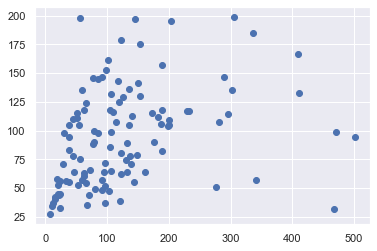

In [21]:
plt.scatter(df_liaison['nbr_trains_retard_depart'],df_liaison['nbr_trains_retard_arrivee'])

In [ ]:
root_cause = df_liaison.pipe(f.get_root_cause)
np.sum(list(root_cause.values()))
root_cause

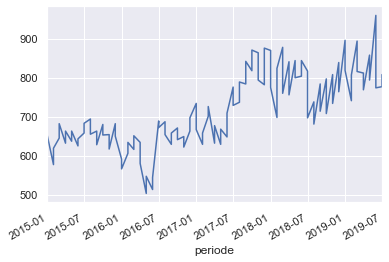

In [55]:
_ = plt.figure()
_ = plt
df_liaison.set_index('periode')['nbr_circulations_prevues'].plot()
_ = plt.show()

In [ ]:
fig = go.Figure()

# Points au départ de la gare 1
tmp = df_liaison[df_liaison['gare_depart']==gare_depart]
fig.add_trace(
    go.Scatter(
        x=tmp['nbr_circulations_prevues'],
        y=tmp['nbr_trains_annules'],
        mode='markers',
        name='sens_1'
    )
)

# Points au départ de la gare 2
tmp = df_liaison[df_liaison['gare_depart']!=gare_depart]
fig.add_trace(
    go.Scatter(
        x=tmp['nbr_circulations_prevues'],
        y=tmp['nbr_trains_annules'],
        mode='markers',
        name='sens_2'
    )
)

fig.show()

# Map visualisation

In [45]:
gare_position = f.load_pickle('gare_gps.p')
gare_position[list(gare_position.keys())[0]]

{'location_object': Location(Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, France, (48.584614, 7.7507127, 0.0)),
 'location_adress': 'Strasbourg, Bas-Rhin, Grand Est, France métropolitaine, France',
 'latitude': 48.584614,
 'longitude': 7.7507127}

In [46]:
df_gare = pd.DataFrame(
    {
        'gare':[key for key in gare_position.keys()],
        'latitude':[value['latitude'] for value in gare_position.values()],
        'longitude':[value['longitude'] for value in gare_position.values()],
        'adresse':[value['location_adress'] for value in gare_position.values()]
    }#,
    #index=[key for key in gare_position.keys()]
).set_index('gare')

df_gare.head()

,latitude,longitude,adresse
gare,,,
STRASBOURG,48.584614,7.750713,"Strasbourg, Bas-Rhin, Grand Est, France métrop..."
PARIS NORD,50.635390,3.069733,"Paris Nord, 16, Rue du Molinel, Lille, Nord, H..."
LYON PART DIEU,45.760542,4.860199,"Lyon Part-Dieu, Gare de Lyon Part-Dieu, Part-D..."
PARIS LYON,48.846970,2.373388,"Paris Lyon, Rue Parrot, Quinze-Vingts, 12e, Pa..."
LILLE,50.636565,3.063528,"Lille, Nord, Hauts-de-France, France métropoli..."


In [47]:
df_map = pd.merge(df, df_gare.reset_index(), left_on='gare_depart', right_on='gare')

In [49]:
#df_map.head()

In [35]:
tmp = df.groupby('gare_depart').sum()[['nbr_trains_annules']].reset_index().merge(df_gare, left_on='gare_depart', right_on='gare')
tmp.head()

,gare_depart,nbr_trains_annules,latitude,longitude,adresse
0,AIX EN PROVENCE TGV,379.0,43.455145,5.317287,"Aix-en-Provence TGV, D 9, La Foraine, Cabriès,..."
1,ANGERS SAINT LAUD,572.0,47.464537,-0.556843,"Angers-Saint-Laud, Esplanade de la Gare, La Do..."
2,ANGOULEME,494.0,45.651275,0.157674,"Angoulême, Charente, Nouvelle-Aquitaine, Franc..."
3,ANNECY,328.0,45.889750,6.135465,"Annecy, Haute-Savoie, Auvergne-Rhône-Alpes, Fr..."
4,ARRAS,660.0,50.291048,2.777221,"Arras, Pas-de-Calais, Hauts-de-France, France ..."


In [36]:
# Define plotly geopgahic position
geo_france = dict(
        resolution=50,
        scope='europe',
        showframe=False,
        showcoastlines=True,
        showland=True,
        landcolor="lightgray",
        countrycolor="white" ,
        coastlinecolor="white",
        projection_type='equirectangular',
        lonaxis_range=[ -5.0, 10.0],
        lataxis_range=[ 42.0, 52.0],
        domain = dict(x=[0, 1], y=[ 0, 1])
    )

In [49]:
scale = 0.1
tmp['text'] = tmp['nbr_trains_annules'].apply(str)  + '  -  ' + tmp['gare_depart'].apply(str)

# Création des données
fig = go.Figure(
    data=go.Scattergeo(
        lon = tmp['longitude'],
        lat = tmp['latitude'],
        text = tmp['text'],
        #mode = 'markers',
        marker = dict(
            size = tmp['nbr_trains_annules']*scale,
            #color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
            )
        )
    )
            
# Création de la figure
fig.update_layout(
        title = 'Grandes gares TGV Françaises',
        geo = geo_france
    )

# Affichage
fig.show()